# Plot the Beta Prior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# custom function taken from https://stackoverflow.com/questions/12432663/what-is-a-clean-way-to-convert-a-string-percent-to-a-float
def p2f(x):
    return float(x.strip('%'))/100

In [3]:
turnout = pd.read_csv('../Data/demographic_turnout_rates.csv', converters={'2018':p2f, '2016':p2f, '2014': p2f,
                                                                          '2012': p2f, '2010':p2f, '2008':p2f,
                                                                          '2006':p2f, '2004':p2f, '2002':p2f, '2000':p2f,
                                                                          '1998':p2f, '1996':p2f, '1994':p2f, '1992':p2f,
                                                                          '1990':p2f, '1988':p2f, '1986':p2f})
age_turnout = pd.read_csv('../Data/age_turnout_rate.csv', converters={'2018':p2f, '2016':p2f, '2014': p2f,
                                                                          '2012': p2f, '2010':p2f, '2008':p2f,
                                                                          '2006':p2f, '2004':p2f, '2002':p2f, '2000':p2f,
                                                                          '1998':p2f, '1996':p2f, '1994':p2f, '1992':p2f,
                                                                          '1990':p2f, '1988':p2f, '1986':p2f})
#This data is the percentages of voter turnout based on overarching demographic groups.
#Let's get our standard deviation and mean to build out a distribution and use it as a prior 

In [4]:
turnout_t = turnout.transpose()
age_turnout_t = age_turnout.transpose()

In [5]:
#Let's modify this dataframe a bit. 
turnout_tr = turnout_t.rename(columns={0: "Non-Hispanic_White", 1: "Non-Hispanic_Black", 
                                      2: "Hispanic", 3: "Other"})
turnout_tr.drop(turnout_tr.index[0], inplace=True)
turnout_tr.head()

,Non-Hispanic_White,Non-Hispanic_Black,Hispanic,Other
2018,0.575,0.509,0.404,0.42
2016,0.653,0.593,0.476,0.49
2014,0.458,0.404,0.27,0.295
2012,0.641,0.664,0.48,0.49
2010,0.486,0.438,0.312,0.341


In [6]:
#And the same for the age turnout dataframe 
age_turnout_t = age_turnout_t.rename(columns={0: '18-29', 1: '30-44', 2: '45-59', 3: '60+'})
age_turnout_t.drop(age_turnout_t.index[0], inplace=True)
age_turnout_t.head()

,18-29,30-44,45-59,60+
2018,0.356,0.488,0.578,0.657
2016,0.461,0.588,0.659,0.703
2014,0.199,0.356,0.473,0.587
2012,0.45,0.595,0.669,0.718
2010,0.24,0.404,0.526,0.608


In [7]:
turnout_tr = turnout_tr.astype('float64')
print(turnout_tr.dtypes)
age_turnout_t = age_turnout_t.astype('float64')
print(age_turnout_t.dtypes)

Non-Hispanic_White    float64
Non-Hispanic_Black    float64
Hispanic              float64
Other                 float64
dtype: object
18-29    float64
30-44    float64
45-59    float64
60+      float64
dtype: object


In [8]:
#So now we can get the mean and standard deviation for each of these groups.
nhw_mean = turnout_tr['Non-Hispanic_White'].mean()
nhw_std = turnout_tr['Non-Hispanic_White'].std()
nhb_mean = turnout_tr['Non-Hispanic_Black'].mean()
nhb_std = turnout_tr['Non-Hispanic_Black'].std()
his_mean = turnout_tr['Hispanic'].mean()
his_std = turnout_tr['Hispanic'].std()
other_mean = turnout_tr['Other'].mean()
other_std = turnout_tr['Other'].std()

In [9]:
young_mean = age_turnout_t['18-29'].mean()
young_std = age_turnout_t['18-29'].std()
thirty_mean = age_turnout_t['30-44'].mean()
thirty_std = age_turnout_t['30-44'].std()
forty_mean = age_turnout_t['45-59'].mean()
forty_std = age_turnout_t['45-59'].std()
sixty_mean = age_turnout_t['60+'].mean()
sixty_std = age_turnout_t['60+'].std()

# Create our Prior Distributions for Both Demographics and Age

In [10]:
model = pm.Model()
with model:
    nhw_dist = pm.Normal('nhw_dist', mu=nhw_mean, sd=nhw_std)
    nhb_dist = pm.Normal('nhb_dist', mu=nhb_mean, sd=nhb_std)
    his_dist = pm.Normal('his_dist', mu=his_mean, sd=his_std)
    other_dist = pm.Normal('other_dist', mu=other_mean, sd=other_std)

In [11]:
with model:
    young_dist = pm.Normal('young_dist', mu=young_mean, sd=young_std)
    thirty_dist = pm.Normal('thirty_dist', mu=thirty_mean, sd=thirty_std)
    forty_dist = pm.Normal('forty_dist', mu=forty_mean, sd=forty_std)
    sixty_dist = pm.Normal('sixty_dist', mu=sixty_mean, sd=sixty_std)

# Create our Likelihood Distributions From Election Results this Primary Season

In [12]:
likelihood = pd.read_csv('../Data/likelihood.csv')
likelihood.dtypes

State     object
18-29    float64
30-44    float64
45-64    float64
65+      float64
dtype: object

In [13]:
likelihood_y_mean = likelihood['18-29'].mean()
likelihood_y_std = likelihood['18-29'].std()
likelihood_thirty_mean = likelihood['30-44'].mean()
likelihood_thirty_std = likelihood['30-44'].std()
likelihood_forty_mean = likelihood['45-64'].mean()
likelihood_forty_std = likelihood['45-64'].std()
likelihood_old_mean = likelihood['65+'].mean()
likelihood_old_std = likelihood['65+'].std()

In [14]:
with pm.Model():
    likelihood_y_dist = pm.Normal('likelihood_y_dist', mu=likelihood_y_mean, sd=likelihood_y_std)
    likelihood_thirty_dist = pm.Normal('likelihood_thirty_dist', mu=likelihood_thirty_mean, sd=likelihood_thirty_std)
    likelihood_forty_dist = pm.Normal('likelihood_forty_dist', mu=likelihood_forty_mean, sd=likelihood_forty_std)
    likelihood_old_dist = pm.Normal('likelihood_old_dist', mu=likelihood_old_mean, sd=likelihood_old_std)

In [ ]:
model = pm.Model()
with model:
    beta_0 = pm.Normal("beta_0", mu = young_mean, sd = young_std)
    beta_1 = pm.Normal('beta_1', mu = likelihood_y_mean, sd = likelihood_y_std)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    Y_obs = pm.Normal('Y_obs',
                     mu = (beta_0 + beta_1 * ))

In [34]:
model = pm.Model()
with model:
    #Here's what I hope to be our prior, a normal distribution of our historical data
    young_dist = pm.Normal('young_dist', mu=young_mean, sd=young_std)
    #Here's what I hope to be our likelihood, a normal distribution of our current data
    likelihood_y_dist = pm.Normal('likelihood_y_dist', mu=likelihood_y_mean, sd=likelihood_y_std)
    sigma = pm.Uniform('sigma', lower = 0, upper = 8)
    trace = pm.sample(1000, random_seed=123)
    Y_obs = pm.Normal('Y_obs',
                     mu = (young_dist + likelihood_y_dist * young_mean),
                     sd = sigma)
    trace = pm.sample(10_000, tune = 1000)
pm.traceplot(trace);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, likelihood_y_dist, young_dist]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1151.75draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


ValueError: Wrong shape for initial_diag: expected 4 got 3

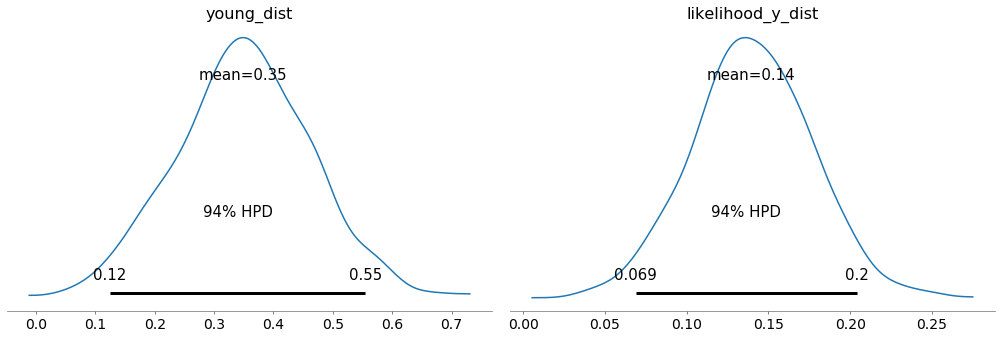

In [21]:
az.plot_posterior(trace);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12abafa90>,
      dtype=object)

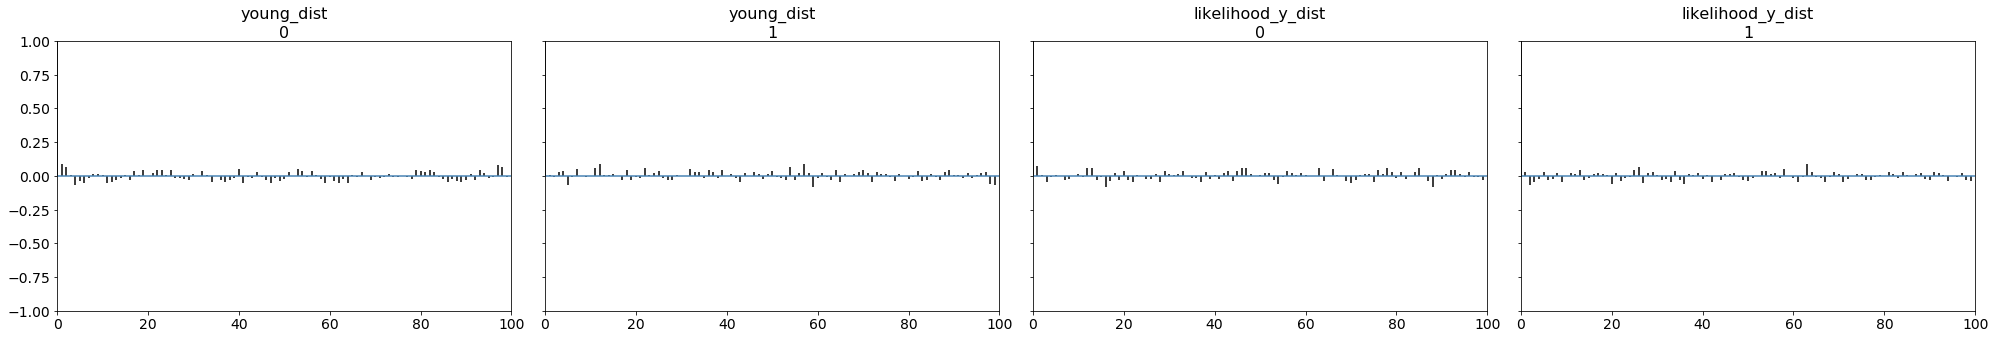

In [27]:
az.plot_autocorr(trace)

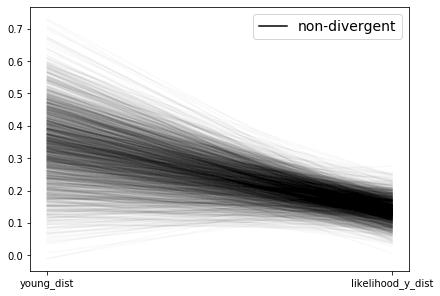

In [28]:
az.plot_parallel(trace)

In [30]:
az.utils

<module 'arviz.utils' from '/Users/danielleo/opt/anaconda3/lib/python3.7/site-packages/arviz/utils.py'>

In [22]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
young_dist,0.349,0.113,0.125,0.555,0.003,0.002,1681.0,1668.0,1675.0,1214.0,1.0
likelihood_y_dist,0.139,0.036,0.069,0.204,0.001,0.001,1820.0,1797.0,1815.0,1550.0,1.0


In [23]:
az.convert_to_dataset(trace)

<xarray.Dataset>
Dimensions:            (chain: 2, draw: 1000)
Coordinates:
  * chain              (chain) int64 0 1
  * draw               (draw) int64 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
Data variables:
    young_dist         (chain, draw) float64 0.4243 0.4243 ... 0.3512 0.347
    likelihood_y_dist  (chain, draw) float64 0.1247 0.1247 ... 0.1698 0.1357
Attributes:
    created_at:                 2020-03-11T20:32:20.161174
    inference_library:          pymc3
    inference_library_version:  3.8

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a7b3890>,
      dtype=object)

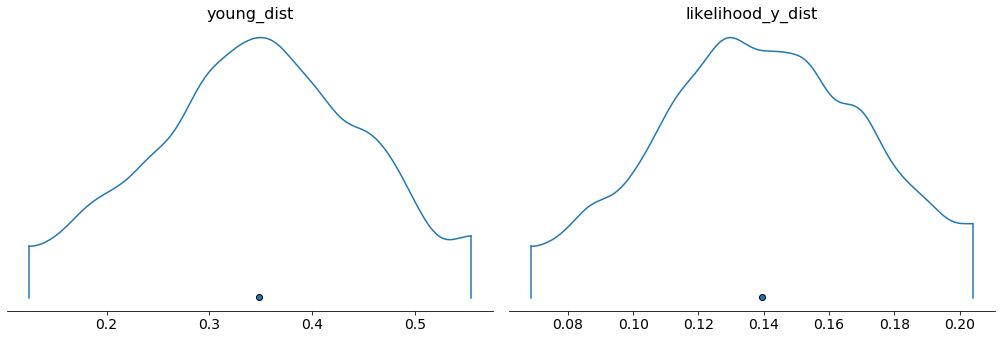

In [24]:
az.plot_density(trace)